In [13]:
from scipy.stats import norm
import numpy as np
import areametric as am
from pyDOE import *
import random
import time
from scipy.stats import wasserstein_distance

random.seed(42)
np.random.seed(0)

x = lhs(1,samples=100)
x = norm(loc=0, scale=1).ppf(x)
normality = norm.rvs(loc=0,scale=1,size=10000)

mini = 100
toadd = 0

for element in x:
    res = wasserstein_distance(element,normality)
    if res < mini:
        mini = res
        toadd = element

mini = 100
toadd2 = 0
for element in x:
    res = wasserstein_distance([element[0],toadd[0]],normality)
    if res<mini:
        mini = res
        toadd2 = element

print(toadd, toadd2)

[0.0142932] [0.71542922]


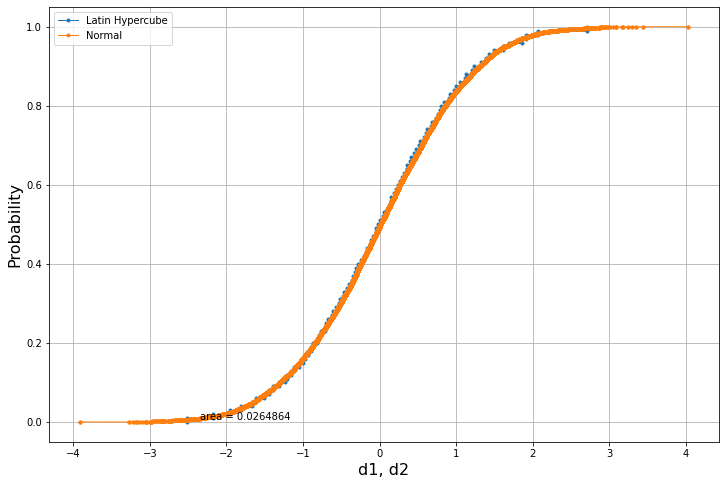

In [3]:
#lhs sampling (100 points)

x = lhs(1,samples=100)
x = norm(loc=0, scale=1).ppf(x)
xx = []
for element in x:
    xx.append(element[0])
am.plot(list(xx), list(normality))

0
1
2
3
4
5
6
7
8
9


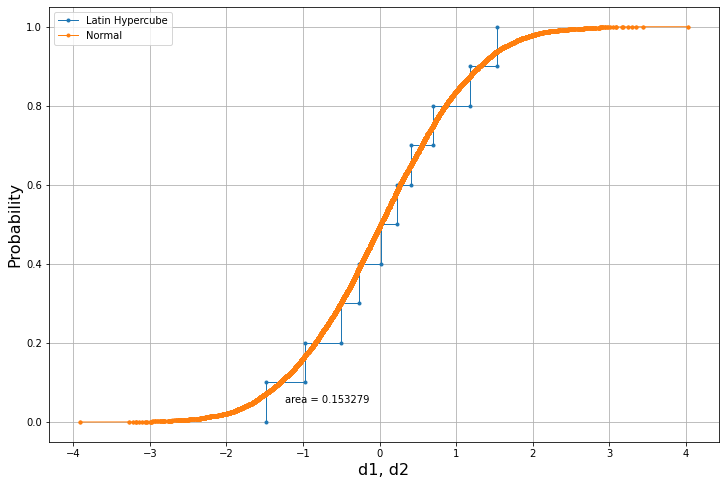

In [11]:
#w sampling from gaussian (50 points)
samples = []

for i in range(10):
    print(i)
    mini = 100
    toadd = 0
    control = samples
    for element in normality:
        control.append(element)
        res = wasserstein_distance(control,normality)
        control.remove(element)
        if res < mini:
            mini = res
            toadd = element
    samples.append(toadd)
    #if i>=1:
        #am.plot(list(samples), list(normality))
am.plot(list(samples), list(normality))

In [12]:
print(samples)

[-0.5105799401080693, 0.01193265684128611, -1.4886543095607925, 0.2237301830542033, 1.5346448508953472, 0.7002063626411997, 1.1830528510232605, -0.9773003335839108, -0.2682885270291877, 0.4084585259498463]


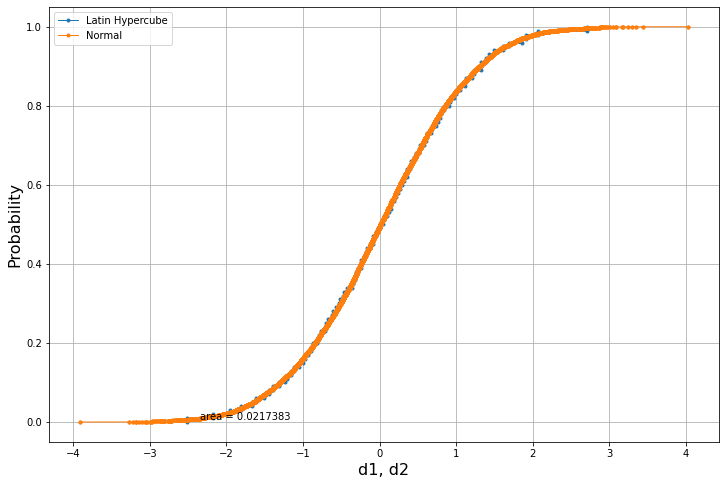

In [44]:
#w sampling from LHS (50 points)

samples = []

for i in range(100):
    mini = 100
    toadd = 0
    control = samples
    for element in x:
        control.append(element[0])
        res = wasserstein_distance(control,normality)
        control.remove(element[0])
        if res < mini:
            mini = res
            toadd = element[0]
    samples.append(toadd)
    #if i>=1:
        #am.plot(list(samples), list(normality))
        
am.plot(list(samples), list(normality))